In [49]:
import pandas as pd
import geoplot
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from geodatasets import get_path

#### Leitura da base de dados

In [23]:
airbnb: pd.DataFrame = pd.read_csv(r'bases\AB_NYC_2019.csv')

#### Visualização dos dados

In [59]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Dimensão da base

In [24]:
airbnb.shape

(48895, 16)

#### Verificando quantos nulos existem

In [25]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### localizando valores

Imóveis disponíveis em Manhattan

In [72]:
airbnb[airbnb['neighbourhood_group'] == 'Manhattan'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [38]:
# Arrumando o grupo de vizinhança já sabendo quais valores quero trocar
def change_name(name):
    if pd.isna(name):
        return name
    if name[0].isupper(): #fazendo a checagem por letra maiúscula pois sei que se entrar representa uma vizinhaça
        return name
    elif name == 'manhatan': #poderia substituir usando match/case e/ou regex (em problemas mais gerais)
        return 'Manhattan'
    else:
        return 'Brooklyn'


airbnb['neighbourhood_group'] = airbnb.loc[:,'neighbourhood_group'].apply(change_name) # aplica a mudança de nomes para manter padrão corretor
airbnb['neighbourhood_group'].unique() # verificando

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

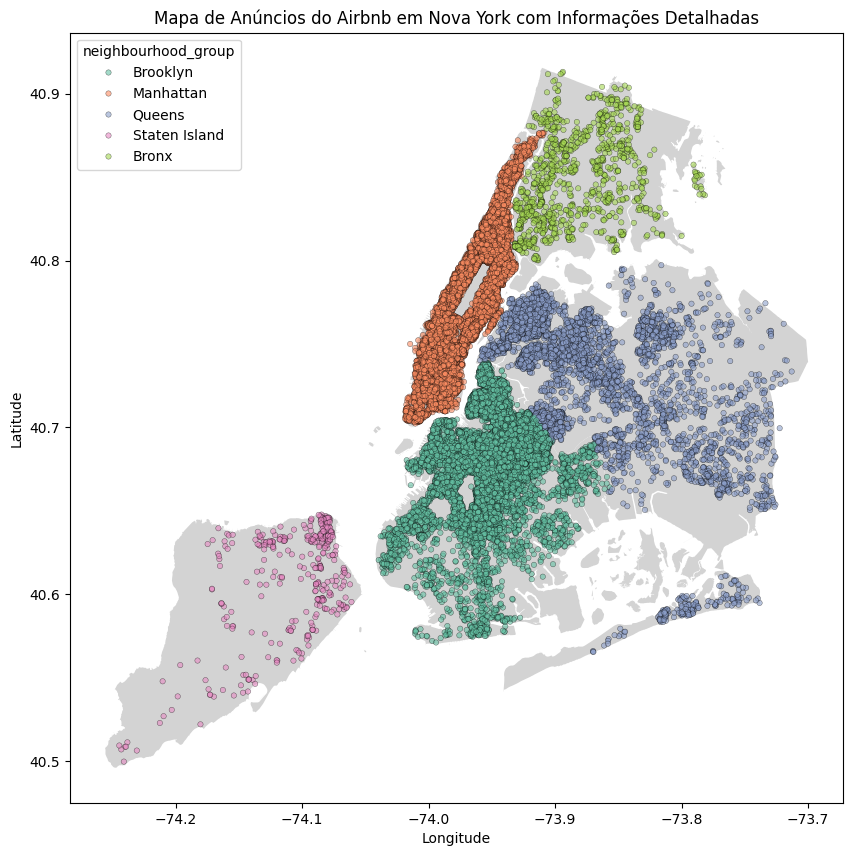

In [58]:
gdf = gpd.GeoDataFrame(
    airbnb, geometry=gpd.points_from_xy(airbnb['longitude'], airbnb['latitude'], crs="EPSG:4326"  # Define o sistema de coordenadas (WGS84)
))

# Carregar dados geográficos da área de Nova York
nybb = gpd.read_file(get_path('nybb'))

# Reprojetar o mapa de Nova York para o mesmo sistema de coordenadas dos pontos
nybb = nybb.to_crs(gdf.crs)

# Criando a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar o mapa base de Nova York
nybb.plot(ax=ax, color='lightgrey')

# Usando Seaborn para plotar os pontos dos anúncios
sns.scatterplot(
    x=gdf.geometry.x,
    y=gdf.geometry.y,
    hue=gdf['neighbourhood_group'],
    palette='Set2',
    s=15,
    edgecolor='black',
    alpha = 0.6,
    ax=ax,
)

# Título e exibição
plt.title('Mapa de Anúncios do Airbnb em Nova York com Informações Detalhadas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [60]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [63]:
agrupamento_bairro = airbnb.groupby(by='neighbourhood_group')['price'].mean()

<Axes: xlabel='neighbourhood_group', ylabel='price'>

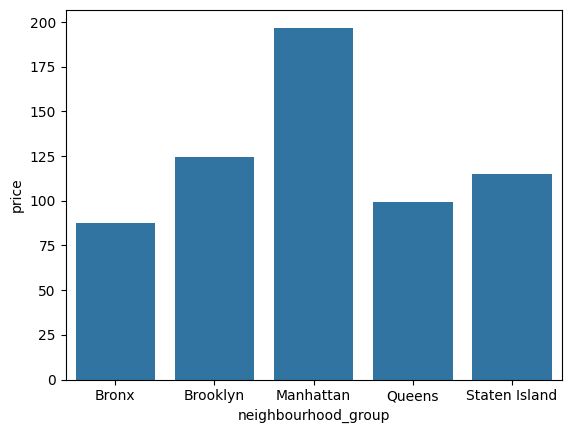

In [67]:
sns.barplot(x=agrupamento_bairro.index, y=agrupamento_bairro)